In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("CustomersTransactions2021.csv")

In [3]:
df.head(2)

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth


In [4]:
df.sort_values('id', inplace=True)
x = df['id']
y = df['txn_total']

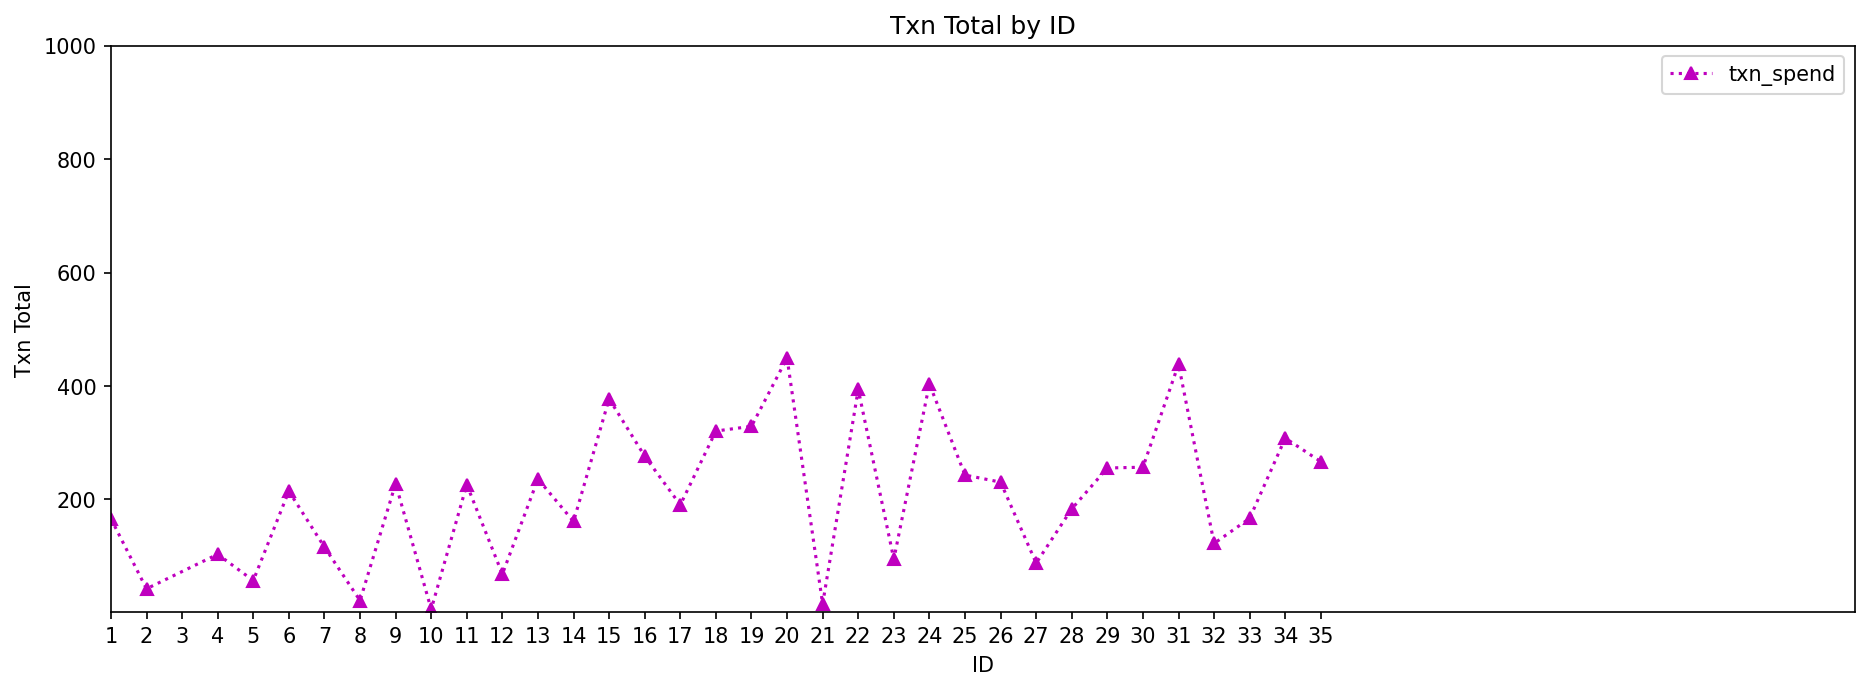

In [5]:
import numpy as np

plt.figure(figsize=(15,5), dpi=150) # first adjust the figure size before plotting
plt.plot(x,y,'^:m', label="txn_spend") # need to specify `label` for `plt.legend()` to work
plt.xlim(xmin=1, xmax=50)
plt.ylim(ymin=1, ymax=1000)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.title("Txn Total by ID")
plt.xlabel("ID")
plt.ylabel("Txn Total")
plt.legend(); # use `;` to ignore text output

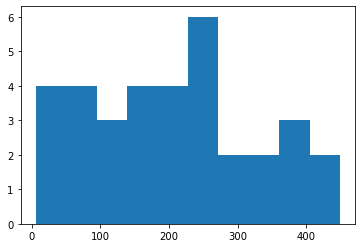

In [6]:
plt.figure()
plt.hist(y); # divides data into 10 buckets and cound how many fall in each bucket

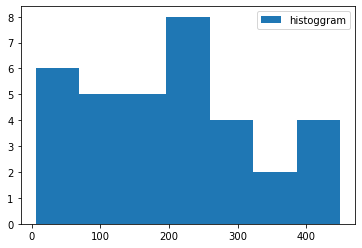

In [7]:
plt.figure()
plt.hist(y, bins=7, label='histoggram')
plt.legend();

In [8]:
# plt.figure()
# plt.boxplot(y)

In [53]:
# figure, ([ax1, ax2, ax3],[ax4, ax5, ax6],[ax7,ax8,ax9]) = plt.subplots(3,3, sharey=True, figsize=(8,4))
# ax1.plot(x,y,'r--')
# ax2.plot(x,y,'m:')
# ax1.set_title("red chart")
# ax2.set_title("magenta chart")
# ax1.set_ylabel("txn_total")
# ax2.set_xlabel("id")
# ax1.set(title='red chart', xticklabels=[1,2,3,4,5])

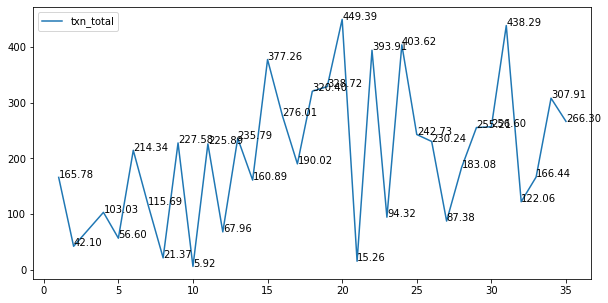

In [23]:
plt.figure(figsize=(10,5))
plt.plot(x,y,label='txn_total')
plt.legend()

for x,y in zip(x,y):
    label = "{:.2f}".format(y)
    plt.annotate(label, (x,y))

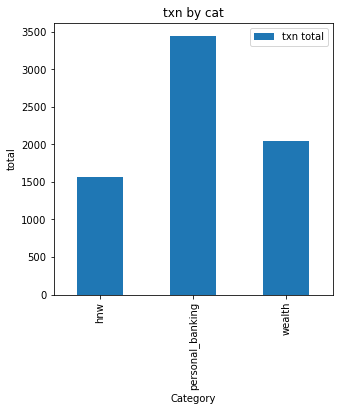

In [9]:
df.groupby('Category')['txn_total'].sum().plot(kind='bar', figsize=(5,5), title='txn by cat', ylabel='total', label='txn total', legend=True);

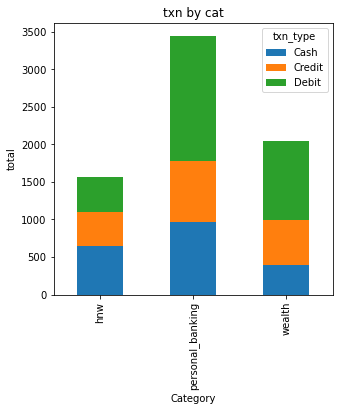

In [51]:
df.groupby(['Category', 'txn_type'])['txn_total'].sum().unstack().plot(
    kind='bar',
    figsize=(5,5),
    stacked=True,
    title='txn by cat',
    ylabel='total',
    label='txn total',
    legend=True);

In [10]:
df['acct_bal'] = np.random.randint(500,10_000, size=len(df))

In [11]:
df.head()

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category,acct_bal
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth,5924
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth,6400
2,1001,4,Credit,103.03,Johnny Awesome,3,ON,1,wealth,8201
3,1001,5,Credit,56.60,Johnny Awesome,3,ON,1,wealth,4431
4,1002,6,Debit,214.34,Bob Marley,4,ON,1,personal_banking,2186


In [12]:
import seaborn as sns

In [14]:
# sns.scatterplot(
#     x='txn_total',
#     y='acct_bal',
#     hue='Category',
#     size='id'
# )

In [15]:
# sns.lmplot('txn_total', 'acct_bal', data=df)

In [ ]:
sns.distplot(df['txn_total'])
sns.distplot(df['acct_bal']/100)

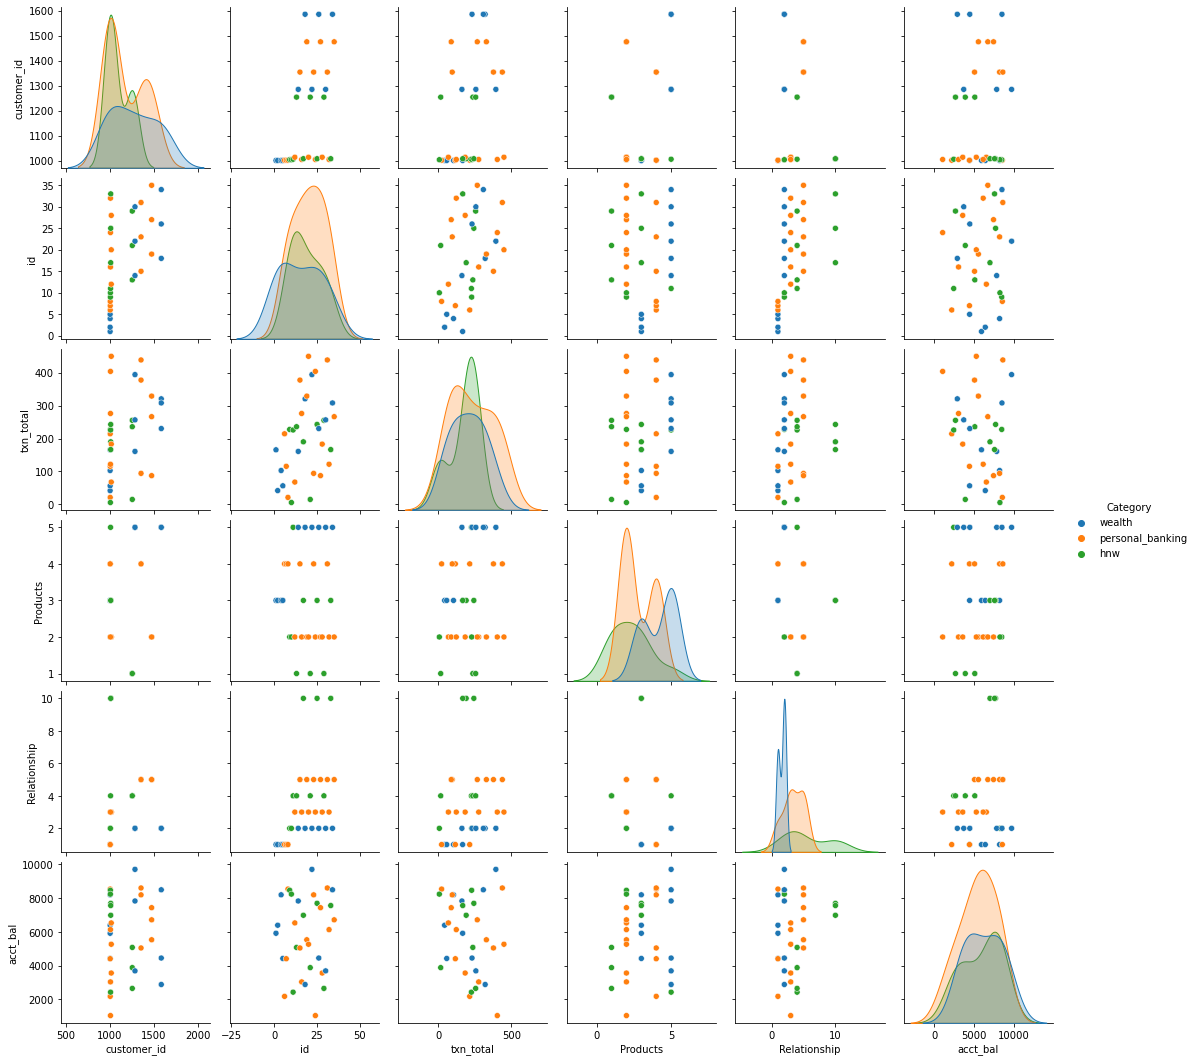

In [18]:
sns.pairplot(df, hue='Category');

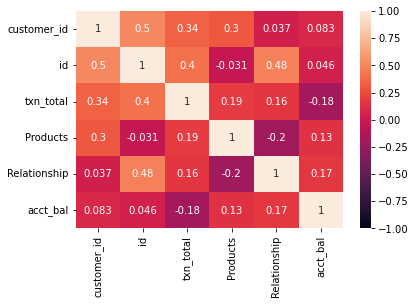

In [17]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

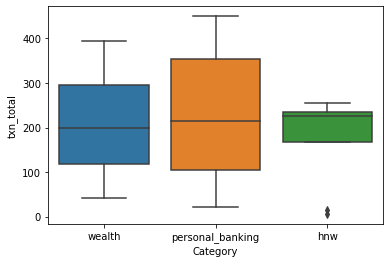

In [16]:
sns.boxplot(x='Category', y='txn_total', data=df);